# Preparation

In [1]:
%cd /home/dvc-2-iris-demo

/home/dvc-2-iris-demo


# Load dataset

In [2]:
from src.data.dataset import get_dataset

In [3]:
dataset = get_dataset('data/raw/iris.csv')
dataset.shape

(150, 5)

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# feature names
feature_names = dataset.columns.tolist()[:4]
feature_names 

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
# iris species
species = dataset['species'].unique().tolist()
species

['setosa', 'versicolor', 'virginica']

# Features engineering

In [7]:
from src.features.features import create_new_features


In [8]:
dataset = create_new_features(dataset)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_in_square,sepal_width_in_square,petal_length_in_square,petal_width_in_square,sepal_length_in_cube,sepal_width_in_cube,petal_length_in_cube,petal_width_in_cube,sepal_length_to_sepal_width,petal_length_to_petal_width,species
0,5.1,3.5,1.4,0.2,26.01,12.25,1.96,0.04,132.651,42.875,2.744,0.008,1.457143,7.0,setosa
1,4.9,3.0,1.4,0.2,24.01,9.00,1.96,0.04,117.649,27.000,2.744,0.008,1.633333,7.0,setosa
2,4.7,3.2,1.3,0.2,22.09,10.24,1.69,0.04,103.823,32.768,2.197,0.008,1.468750,6.5,setosa
3,4.6,3.1,1.5,0.2,21.16,9.61,2.25,0.04,97.336,29.791,3.375,0.008,1.483871,7.5,setosa
4,5.0,3.6,1.4,0.2,25.00,12.96,1.96,0.04,125.000,46.656,2.744,0.008,1.388889,7.0,setosa


# Split dataset

In [9]:
from src.transforms.trainsforms import transform_targets_to_numerics, split_dataset_in_train_test

In [10]:
test_size = 0.2
random_state = 42

## transform targets (species) to numerics

In [11]:
dataset = transform_targets_to_numerics(dataset, 'species')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_in_square,sepal_width_in_square,petal_length_in_square,petal_width_in_square,sepal_length_in_cube,sepal_width_in_cube,petal_length_in_cube,petal_width_in_cube,sepal_length_to_sepal_width,petal_length_to_petal_width,species
0,5.1,3.5,1.4,0.2,26.01,12.25,1.96,0.04,132.651,42.875,2.744,0.008,1.457143,7.0,0
1,4.9,3.0,1.4,0.2,24.01,9.00,1.96,0.04,117.649,27.000,2.744,0.008,1.633333,7.0,0
2,4.7,3.2,1.3,0.2,22.09,10.24,1.69,0.04,103.823,32.768,2.197,0.008,1.468750,6.5,0
3,4.6,3.1,1.5,0.2,21.16,9.61,2.25,0.04,97.336,29.791,3.375,0.008,1.483871,7.5,0
4,5.0,3.6,1.4,0.2,25.00,12.96,1.96,0.04,125.000,46.656,2.744,0.008,1.388889,7.0,0


## Split in train/test

In [12]:
train_dataset, test_dataset = split_dataset_in_train_test(dataset, test_size=test_size, random_state=random_state)
train_dataset.shape, test_dataset.shape

((120, 15), (30, 15))

# Train

In [13]:
from src.train.train import get_supported_estimator, train

In [14]:
# supported classifiers
get_supported_estimator()

{'logreg': sklearn.linear_model.logistic.LogisticRegression,
 'svm': sklearn.svm.classes.SVC,
 'knn': sklearn.neighbors.classification.KNeighborsClassifier}

In [15]:
estimator_name = 'logreg'
grid_search_cv_config = {
    'param_grid':{ 
        'C': [0.001,0.01],
        'max_iter': [5000,6000],
        'solver': ['lbfgs', 'sag'],
        'multi_class': ['multinomial']
    },
    'scoring': 'f1_macro',
    'cv': 10
}

In [21]:
model = train(
    df=dataset,
    features_columns_range=['sepal_length', 'petal_length_to_petal_width'],
    target_column='species',
    estimator_name=estimator_name,
    grid_search_cv_config=grid_search_cv_config
)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [22]:
model.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluate

In [23]:
from src.evaluate.evaluate import evaluate
from src.report.visualize import plot_confusion_matrix

In [24]:
f1, cm = evaluate(
    df=dataset,
    features_columns_range=['sepal_length', 'petal_length_to_petal_width'],
    target_column='species',
    clf=model
)

In [25]:
f1

0.9866666666666667

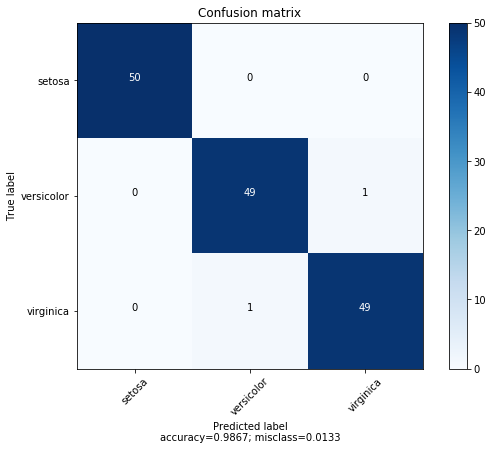

In [26]:
plot_confusion_matrix(cm, species, normalize=False)